# RGB Component Analysis by Category
---

## Import

In [75]:
import cv2
import os
import seaborn as sns
import json
import multiprocessing as mp
from tqdm import tqdm
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})

## Config

In [76]:
CONFIG = {
    "path_data":"../../../dataset/",
    "info_data_train":"train.json",  # images, annotations
    "class":['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing'],
}

## Load Json

In [77]:
with open(os.path.join(CONFIG['path_data'], CONFIG['info_data_train'])) as js:
    json_train = json.load(js)

In [78]:
info_train = json_train['images']
annotations_train = json_train['annotations']
df = pd.DataFrame(info_train)
df['annotations'] = [[] for _ in info_train]
for an in annotations_train:
    df['annotations'].values[an['image_id']].append(an)


## Calc RGB Info

In [42]:
def get_image_info(data):
    img = cv2.imread(os.path.join(CONFIG['path_data'], data[2]))
    results = []
    for annotation in data[8]:
        bbox = annotation['bbox']
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0]+bbox[2]), int(bbox[1]+bbox[3]))
        img_sub = img[p1[1]:p2[1],p1[0]:p2[0]]
        img_splited = cv2.split(img_sub)
        annotation['r_average'] = np.average(img_splited[2])
        annotation['r_mean'] = np.mean(img_splited[2])
        annotation['r_std'] = np.std(img_splited[2])
        annotation['g_average'] = np.average(img_splited[1])
        annotation['g_mean'] = np.mean(img_splited[1])
        annotation['g_std'] = np.std(img_splited[1])
        annotation['b_average'] = np.average(img_splited[0])
        annotation['b_mean'] = np.mean(img_splited[0])
        annotation['b_std'] = np.std(img_splited[0])
        results.append(annotation)
    return results

pool = mp.Pool()
annotations_result = []
for ans in pool.map(get_image_info, tqdm(df.values)):
    for an in ans:
        annotations_result.append(an)


100%|██████████| 4883/4883 [00:11<00:00, 429.67it/s]


In [59]:
df_result = pd.DataFrame(annotations_result)
df_result['category'] = [CONFIG['class'][i] for i in df_result['category_id'].values]
df_result.head()

,image_id,category_id,area,bbox,iscrowd,id,r_average,r_mean,r_std,g_average,g_mean,g_std,b_average,b_mean,b_std,category
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,149.182470,149.182470,43.196367,147.487250,147.487250,43.938493,143.455436,143.455436,50.438498,General trash
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1,60.050402,60.050402,45.284242,59.303286,59.303286,43.715588,60.019967,60.019967,42.558687,Metal
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2,109.268811,109.268811,61.673009,106.741835,106.741835,60.580452,94.735386,94.735386,60.851146,Plastic bag
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3,114.999334,114.999334,65.822458,105.728204,105.728204,62.855104,91.281500,91.281500,58.061363,Glass
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4,103.600067,103.600067,44.762133,98.250469,98.250469,50.599270,96.646485,96.646485,44.846229,Plastic


## RGB Component Analysis - Average, Std by Channel

### For Red

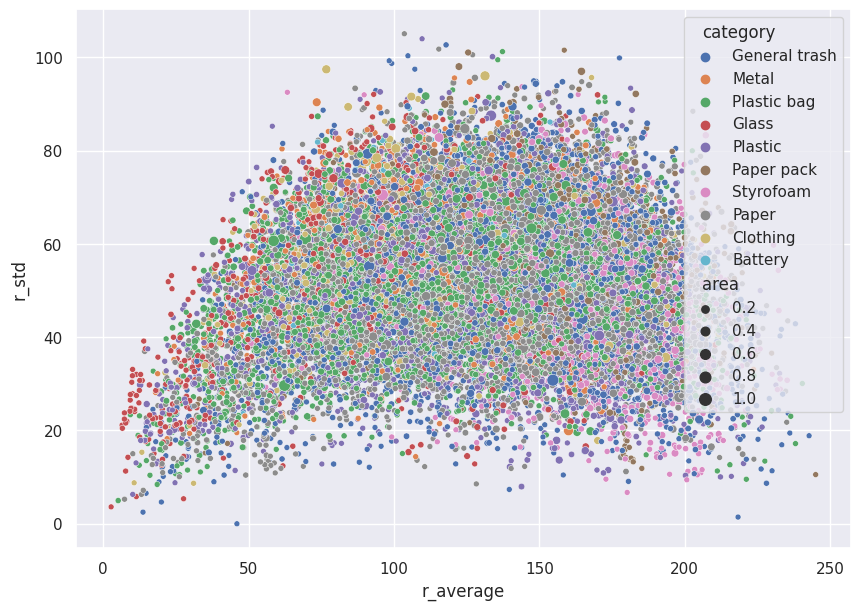

In [69]:
sns.set(rc={'figure.figsize':(10,7)})
plot = sns.scatterplot(df_result, x='r_average', y='r_std', size='area', hue='category')

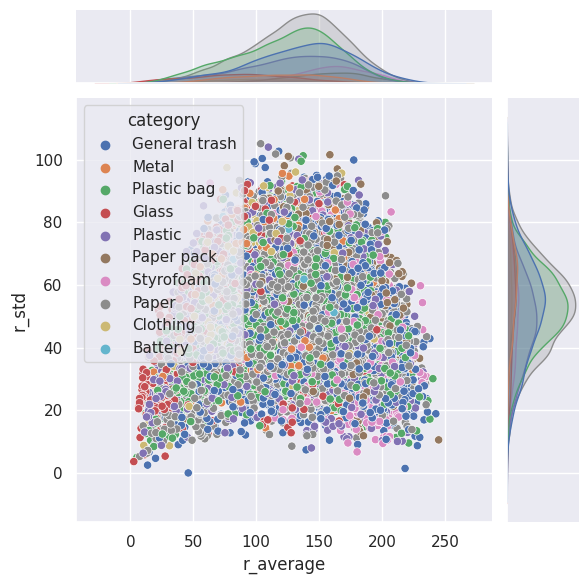

In [70]:
sns.jointplot(data=df_result, kind='scatter', x='r_average', y='r_std', hue='category')

### For Green

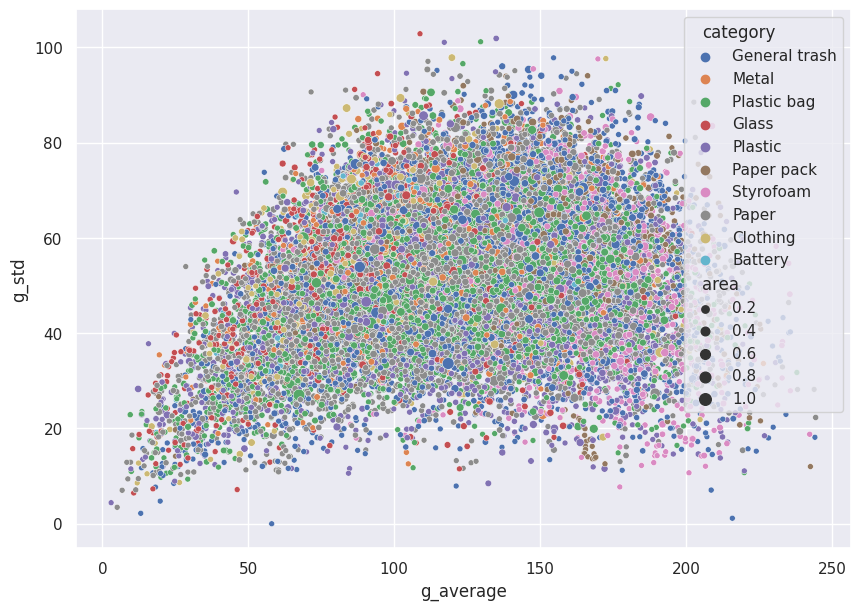

In [62]:
sns.set(rc={'figure.figsize':(10,7)})
plot = sns.scatterplot(df_result, x='g_average', y='g_std', size='area', hue='category')

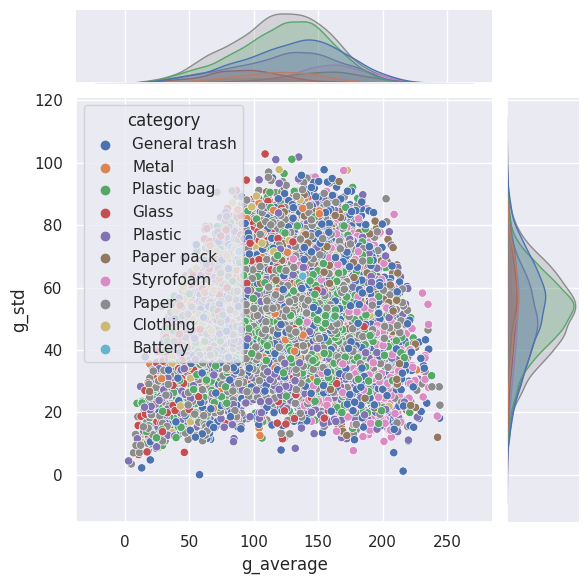

In [71]:
sns.jointplot(data=df_result, kind='scatter', x='g_average', y='g_std', hue='category')

### For Blue

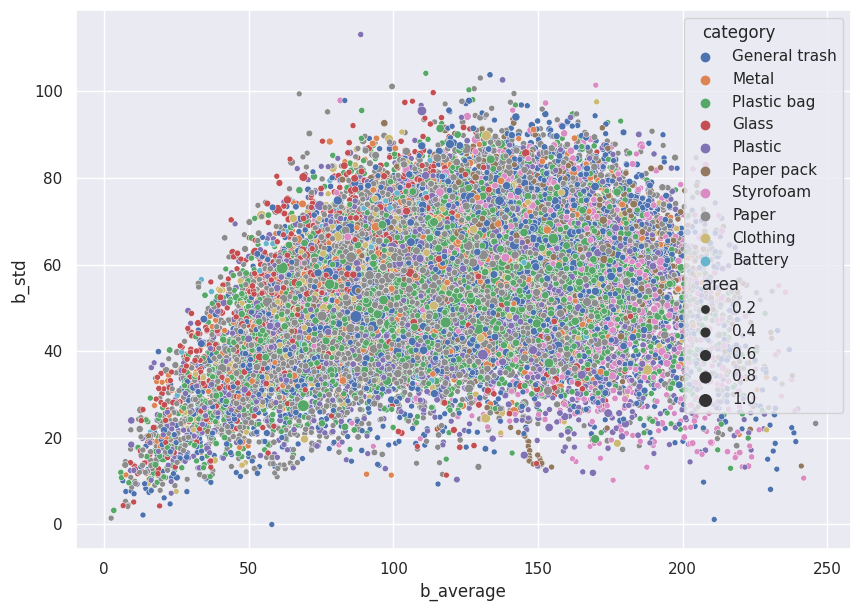

In [65]:
sns.set(rc={'figure.figsize':(10,7)})
plot = sns.scatterplot(df_result, x='b_average', y='b_std', size='area', hue='category')

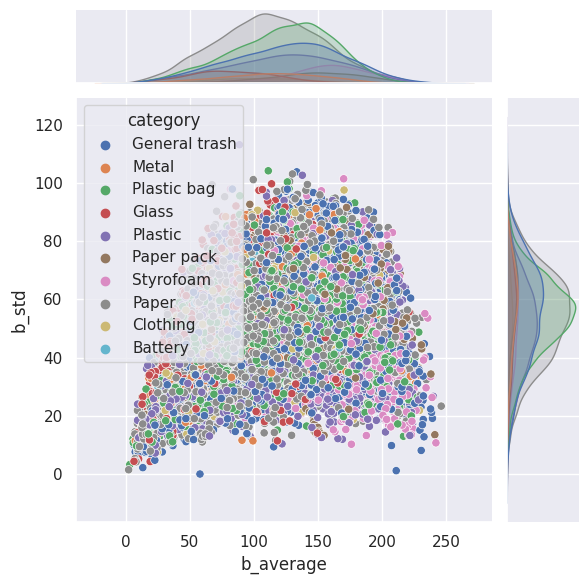

In [72]:
sns.jointplot(data=df_result, kind='scatter', x='b_average', y='b_std', hue='category')

## RGB Component Analysis - RGB Average

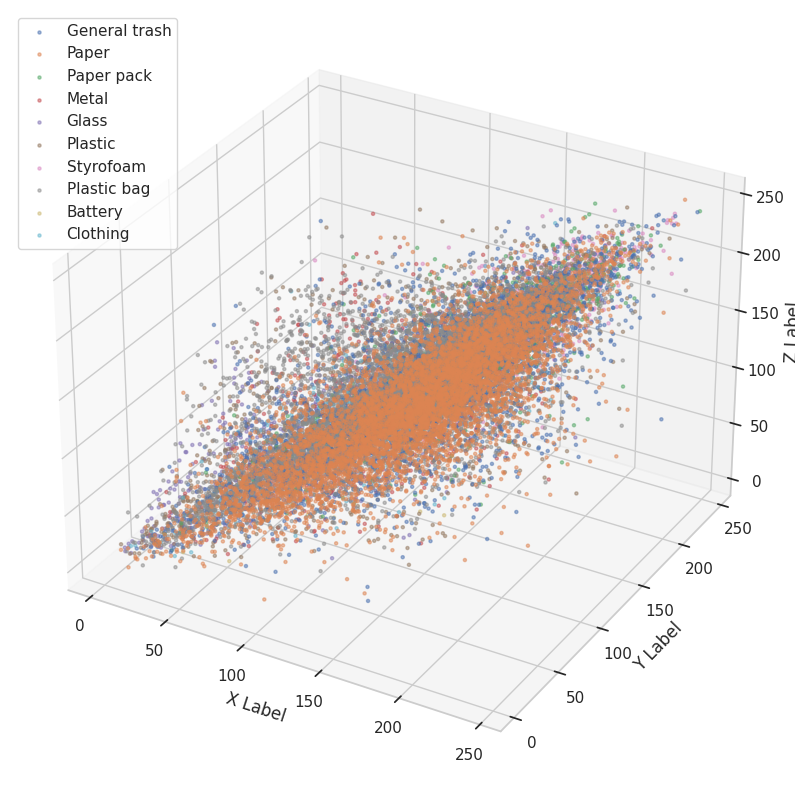

In [106]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d') # Method 2
for i in range(len(CONFIG['class'])):
    label = CONFIG['class'][i]
    x = df_result[df_result['category_id']==i]['r_average']
    y = df_result[df_result['category_id']==i]['g_average']
    z = df_result[df_result['category_id']==i]['b_average']
    c = df_result[df_result['category_id']==i]['category_id']
    ax.scatter(x, y, z, label=label, marker='.', alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
fig.show()

## RGB Component Analysis - RGB Mean

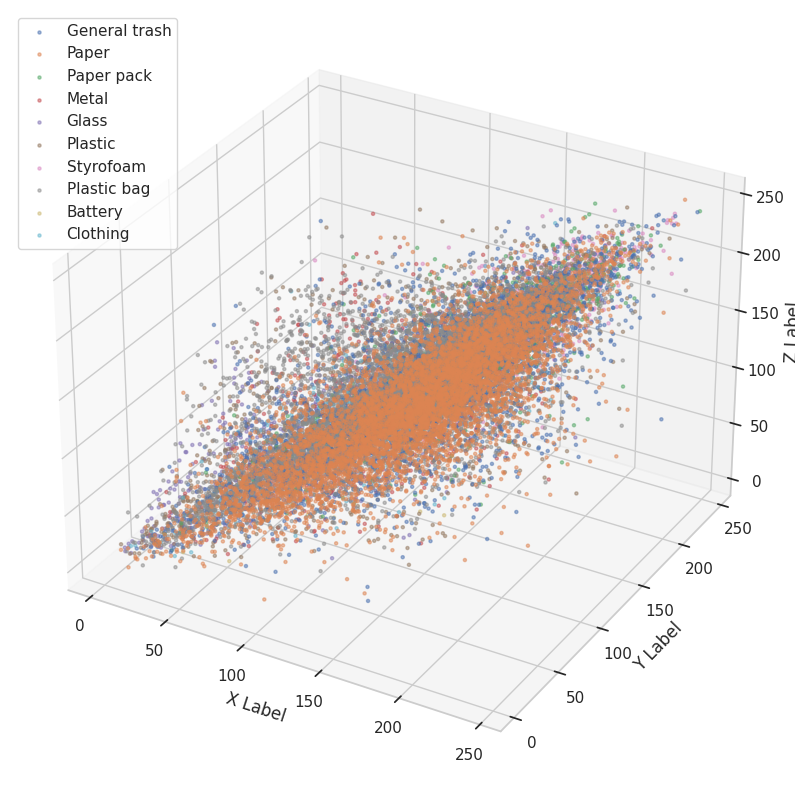

In [108]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d') # Method 2
for i in range(len(CONFIG['class'])):
    label = CONFIG['class'][i]
    x = df_result[df_result['category_id']==i]['r_mean']
    y = df_result[df_result['category_id']==i]['g_mean']
    z = df_result[df_result['category_id']==i]['b_mean']
    c = df_result[df_result['category_id']==i]['category_id']
    ax.scatter(x, y, z, label=label, marker='.', alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
fig.show()

## RGB Component Analysis - RGB Std

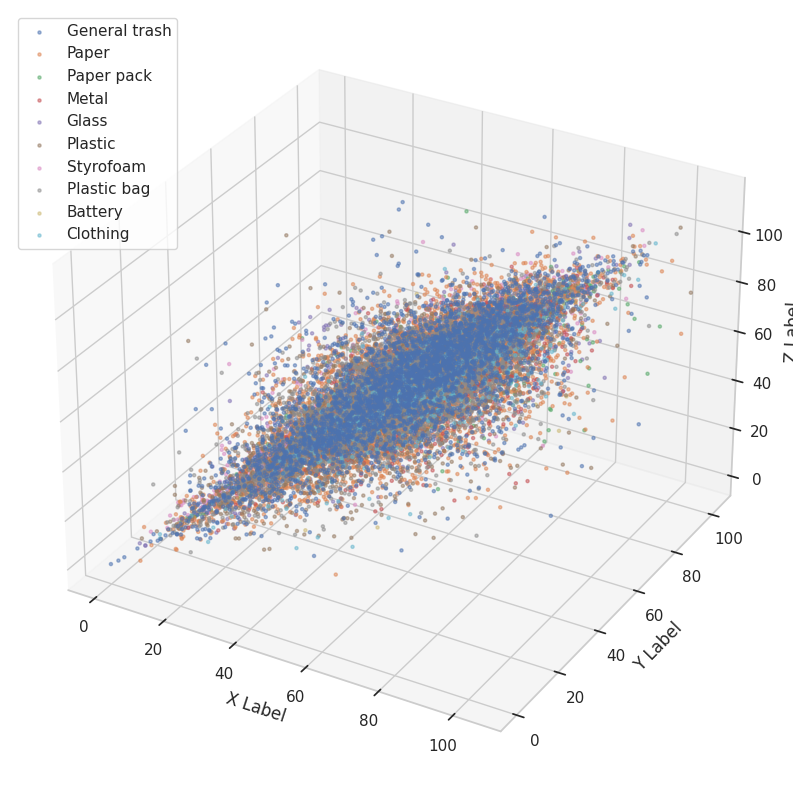

In [109]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d') # Method 2
for i in range(len(CONFIG['class'])):
    label = CONFIG['class'][i]
    x = df_result[df_result['category_id']==i]['r_std']
    y = df_result[df_result['category_id']==i]['g_std']
    z = df_result[df_result['category_id']==i]['b_std']
    c = df_result[df_result['category_id']==i]['category_id']
    ax.scatter(x, y, z, label=label, marker='.', alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
fig.show()